# Movie Ratings - Classification Model

In [1]:
# Import initial dependencies
import pandas as pd
import os
import nltk
import matplotlib.pyplot as plt

In [2]:
# Import movies dataframe
movies_df = pd.read_csv("https://data-bootcamp-ztc.s3.amazonaws.com/movies_complete_cleaned.csv")
movies_df.head(2)

,name,production,director,runtime,released,year,month,country_kaggle,country_omdb,star_kaggle,...,plot,awards,score_imdb,votes_imdb,score_metacritic,budget,genre_kaggle,gross,genres_omdb,rating
0,Doctor Strange,Marvel Studios,Scott Derrickson,115,2016-11-04,2016,11,USA,USA,Benedict Cumberbatch,...,"Marvel's ""Doctor Strange"" follows the story of...",Nominated for 1 Oscar. Another 19 wins & 67 no...,7.5,348307,72.0,165000000,Action,232641920,"Action, Adventure, Fantasy, Sci-Fi",PG-13
1,Sleight,Diablo Entertainment (II),J.D. Dillard,89,2017-04-28,2016,4,USA,USA,Jacob Latimore,...,A young street magician (Jacob Latimore) is le...,3 nominations.,5.9,4012,62.0,250000,Action,3986245,"Crime, Drama, Sci-Fi",R


In [3]:
movies_df["rating"].value_counts()

R        3261
PG-13    1903
PG        927
G         143
NC-17      22
Name: rating, dtype: int64

In [4]:
#drop NC-17 as there are very few instances
movies_df = movies_df[movies_df["rating"]  != "NC-17"]

In [5]:
movies_df["genre_kaggle"].value_counts()

Comedy       1943
Action       1243
Drama        1225
Crime         460
Adventure     376
Biography     333
Animation     266
Horror        259
Mystery        37
Fantasy        29
Thriller       16
Family         14
Romance        14
Sci-Fi         13
Western         2
Musical         2
War             2
Name: genre_kaggle, dtype: int64

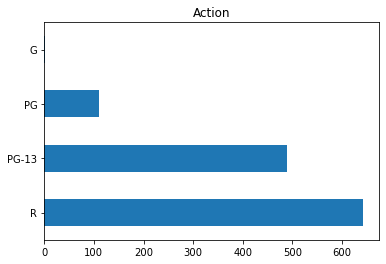

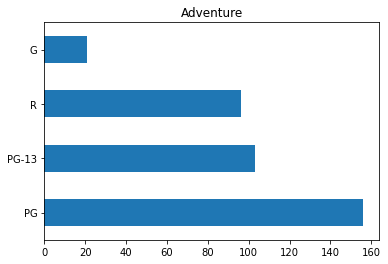

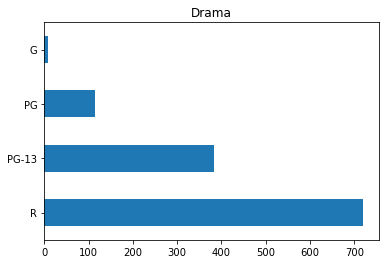

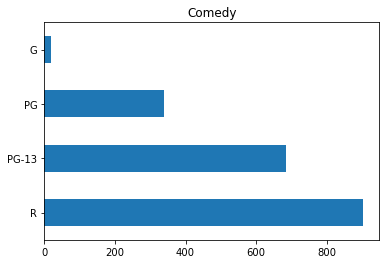

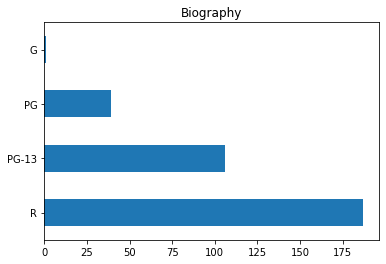

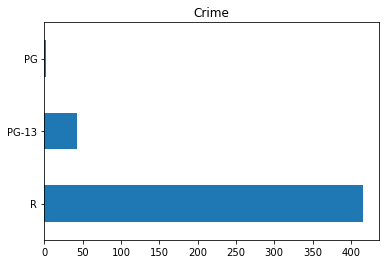

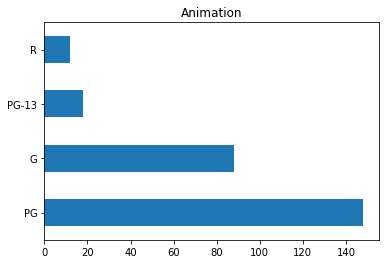

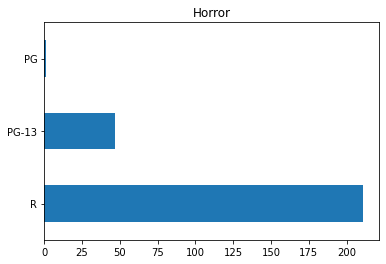

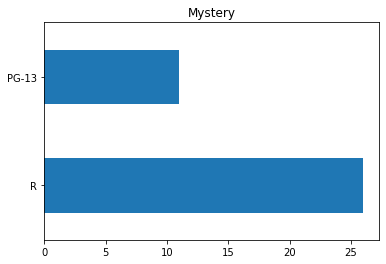

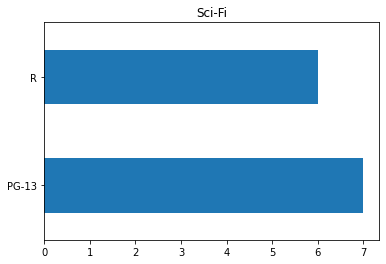

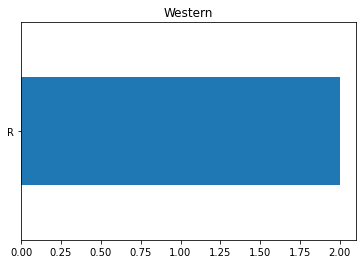

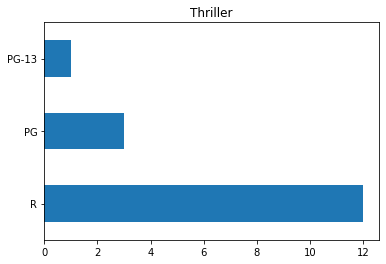

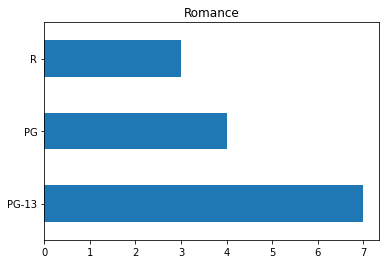

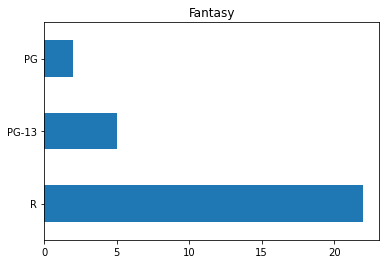

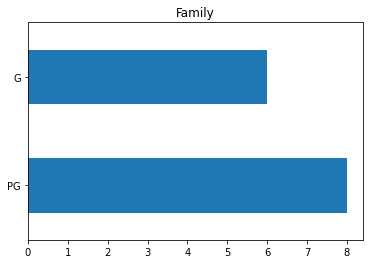

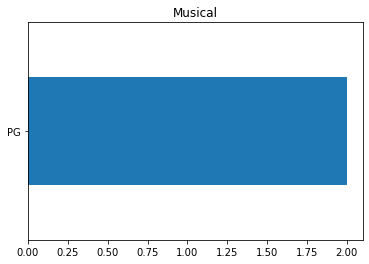

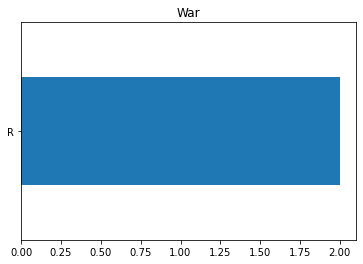

In [6]:
for genre in movies_df['genre_kaggle'].unique():
#     print(genre)
    df = movies_df[movies_df['genre_kaggle']==genre]  
#     print(len(df))
    plt.figure()
    plt.title(genre)
    df['rating'].value_counts().plot(kind='barh')

plt.show()

## Cleaning Data for Tokenization

In [7]:
# Extract plot data
df = movies_df[["name", "plot", "genre_kaggle", "rating"]]
df.set_index("name",inplace = True)
df.head()

,plot,genre_kaggle,rating
name,,,
Doctor Strange,"Marvel's ""Doctor Strange"" follows the story of...",Action,PG-13
Sleight,A young street magician (Jacob Latimore) is le...,Action,R
Silence,The story of two Catholic missionaries (Andrew...,Adventure,R
Manchester by the Sea,"Lee Chandler is a brooding, irritable loner wh...",Drama,R
Dirty Grandpa,"Jason Kelly, the grandson of Dick Kelly, loses...",Comedy,R


In [8]:
df["plot"].fillna("", inplace=True)

/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [9]:
# Remove punctuation
import string


def remove_punct(text):
    table = str.maketrans("", "", string.punctuation)
    return text.translate(table)


df["plot"] = [remove_punct(x) for x in df["plot"]]

/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [10]:
# Remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))


def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]

    return " ".join(text)


df["plot"] = [remove_stopwords(x) for x in df["plot"]]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/daniellepintacasi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [11]:
#adding plot length feature

df["plot_len"] = [len(x) for x in df["plot"]]

/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
df

,plot,genre_kaggle,rating,plot_len
name,,,,
Doctor Strange,marvels doctor strange follows story talented ...,Action,PG-13,365
Sleight,young street magician jacob latimore left care...,Action,R,181
Silence,story two catholic missionaries andrew garfiel...,Adventure,R,176
Manchester by the Sea,lee chandler brooding irritable loner works ha...,Drama,R,294
Dirty Grandpa,jason kelly grandson dick kelly loses grandmot...,Comedy,R,226
...,...,...,...,...
Hoosiers,based true story smalltown indiana team made s...,Drama,PG,165
Off Beat,traumatised paramedic looks woman dreams,Comedy,PG,40
Big Trouble in Little China,truck driver jack burton arrives chinatown san...,Action,PG-13,577


### Encode Ratings Label

In [13]:
# Import label encoder 
from sklearn import preprocessing

# Set label encoder method to variable for use
label_encoder = preprocessing.LabelEncoder()

# Encode ratigs  
df["encoded_rating"] = label_encoder.fit_transform(df["rating"]) 
df.head()

/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,plot,genre_kaggle,rating,plot_len,encoded_rating
name,,,,,
Doctor Strange,marvels doctor strange follows story talented ...,Action,PG-13,365,2
Sleight,young street magician jacob latimore left care...,Action,R,181,3
Silence,story two catholic missionaries andrew garfiel...,Adventure,R,176,3
Manchester by the Sea,lee chandler brooding irritable loner works ha...,Drama,R,294,3
Dirty Grandpa,jason kelly grandson dick kelly loses grandmot...,Comedy,R,226,3


In [14]:
print("check encoding:")
print("---------------------------------------------------------------------------")
print(df.rating.value_counts())
print("---------------------------------------------------------------------------")
print(df.encoded_rating.value_counts())

check encoding:
---------------------------------------------------------------------------
R        3261
PG-13    1903
PG        927
G         143
Name: rating, dtype: int64
---------------------------------------------------------------------------
3    3261
2    1903
1     927
0     143
Name: encoded_rating, dtype: int64


### Encoding Genre and converting it into a matrix

In [15]:
genres = pd.get_dummies(df["genre_kaggle"])  # one hot encoding genres
genres.head(3)

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
name,,,,,,,,,,,,,,,,,
Doctor Strange,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Sleight,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Silence,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
clean_df = pd.merge(df, genres, how = "left", on = "name")
clean_df.head(2)
# import scipy
# from scipy.sparse import csr_matrix
# genres_mat = scipy.sparse.csr_matrix(genres.values)
# genres_mat

,plot,genre_kaggle,rating,plot_len,encoded_rating,Action,Adventure,Animation,Biography,Comedy,...,Family,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
name,,,,,,,,,,,,,,,,,,,,,
Doctor Strange,marvels doctor strange follows story talented ...,Action,PG-13,365,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sleight,young street magician jacob latimore left care...,Action,R,181,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Split Data

In [17]:
from sklearn.model_selection import train_test_split
X = clean_df.drop(columns = ["genre_kaggle","rating","encoded_rating"])
y = clean_df["encoded_rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train

,plot,plot_len,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
name,,,,,,,,,,,,,,,,,,,
Hard Promises,man doesnt like stable work environments away ...,262,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
El juego del miedo VI,,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
A.I. Artificial Intelligence,notsofar future polar ice caps melted resultin...,518,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Rapsodia en agosto,,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
That Awkward Moment,jason dumped didnt even realize going meanwhil...,356,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Permanent Midnight,comedy writer jerry stahl whose 6000aweek hero...,404,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
True Identity,true identity comedy black actor named miles p...,532,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Love & Murder,murphy american living paris enters highly sex...,147,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Tokenization

In [18]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# hash plot
cv = HashingVectorizer().fit(X_train["plot"])
X_train_counts = cv.transform(X_train["plot"])
X_test_counts = cv.transform(X_test["plot"])

# pass the hashed vector through a tfidf transformer
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_counts)
X_train_tfidf = tf_transformer.transform(X_train_counts)
X_test_tfidf = tf_transformer.transform(X_test_counts)

print("------------------------------")
print(f"Type: {type(X_train_tfidf)}")
print(f"Shape : {X_train_tfidf.shape}")
print("------------------------------")
print("See one vector to check: \n")
print(X_train_tfidf)

------------------------------
Type: <class 'scipy.sparse.csr.csr_matrix'>
Shape : (4675, 1048576)
------------------------------
See one vector to check: 

  (0, 1044795)	0.10361481633509335
  (0, 1044318)	-0.17549910565821986
  (0, 1028871)	0.15707370587907726
  (0, 1010002)	-0.1619488799539372
  (0, 1001111)	0.1337860746505659
  (0, 975831)	-0.1209499933999824
  (0, 949757)	0.13072960783981136
  (0, 908475)	-0.13922920435904731
  (0, 887334)	0.1270705232053098
  (0, 865698)	0.09296541413390898
  (0, 831271)	-0.11769624496172522
  (0, 825537)	-0.21495024447831454
  (0, 759455)	-0.12566402633387508
  (0, 745451)	-0.10215634114079349
  (0, 588962)	-0.12566402633387508
  (0, 585652)	0.14030955265068806
  (0, 524212)	0.13697636854413842
  (0, 518913)	0.11685527962923703
  (0, 484920)	-0.0988994980624522
  (0, 467032)	0.12001801523043129
  (0, 416002)	0.201501654078737
  (0, 351030)	-0.22016549762621118
  (0, 323739)	-0.197138432961469
  (0, 303493)	0.11644314228811156
  (0, 242749)	0.161

In [19]:
#create matrix with other features data

import numpy as np
from scipy.sparse import csr_matrix

# X_train_extra_features_mat = csr_matrix(X_train.drop(columns=["plot"])) #run these lines to include plot len
# X_test_extra_features_mat = csr_matrix(X_test.drop(columns=["plot"])) #run these lines to include plot len
X_train_extra_features_mat = csr_matrix(X_train.drop(columns=["plot", "plot_len"]))
X_test_extra_features_mat = csr_matrix(X_test.drop(columns=["plot", "plot_len"]))
X_train_extra_features_mat.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [20]:
#combine both matices 
from scipy.sparse import hstack

X_train_full = hstack([X_train_tfidf, X_train_extra_features_mat])
X_test_full = hstack([X_test_tfidf, X_test_extra_features_mat])

print(X_train_full.shape)
print(X_test_full.shape)

(4675, 1048593)
(1559, 1048593)


### Train and Fit Model

In [21]:
"""
with genres no balancing
"""
# Support vector machine linear classifier
from sklearn.svm import SVC 

model = SVC(kernel='linear')
model.fit(X_train_full, y_train)

SVC(kernel='linear')

In [22]:
# Calculate classification report
from sklearn.metrics import classification_report

predictions = model.predict(X_test_full)
target_names = ["G", "PG", "PG-13", "R"]
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

           G       1.00      0.03      0.05        38
          PG       0.43      0.31      0.36       215
       PG-13       0.48      0.29      0.36       489
           R       0.62      0.84      0.71       817

    accuracy                           0.58      1559
   macro avg       0.63      0.37      0.37      1559
weighted avg       0.56      0.58      0.54      1559



In [23]:
"""
With genres with balancing
"""
#join ifidf vector and genre data


# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear',  class_weight='balanced')
model.fit(X_train_full, y_train)

# Calculate classification report
from sklearn.metrics import classification_report
target_names = ["G", "PG", "PG-13", "R"]
predictions = model.predict(X_test_full)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

           G       0.46      0.47      0.47        38
          PG       0.33      0.34      0.34       215
       PG-13       0.43      0.55      0.48       489
           R       0.71      0.58      0.64       817

    accuracy                           0.54      1559
   macro avg       0.48      0.49      0.48      1559
weighted avg       0.56      0.54      0.54      1559



In [24]:
"""
without genre with balancing
"""

target_names = ["G", "PG", "PG-13", "R"]

# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear',  class_weight='balanced')
model.fit(X_train_tfidf, y_train)

# Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test_tfidf)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

           G       0.50      0.05      0.10        38
          PG       0.31      0.31      0.31       215
       PG-13       0.43      0.43      0.43       489
           R       0.66      0.69      0.67       817

    accuracy                           0.54      1559
   macro avg       0.48      0.37      0.38      1559
weighted avg       0.54      0.54      0.53      1559



In [25]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report

# target_names = ["G", "PG", "PG-13", "R"]


# # Set the parameters by cross-validation
# tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                      'C': [1, 10, 100, 1000] },
#                     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

# scores = ['precision', 'recall']

# for score in scores:
#     print("# Tuning hyper-parameters for %s" % score)
#     print()

#     clf = GridSearchCV(
#         SVC(class_weight = "balanced"), tuned_parameters, scoring='%s_macro' % score
#     )
#     clf.fit(X_train_full, y_train)

#     print("Best parameters set found on development set:")
#     print()
#     print(clf.best_params_)
#     print()
#     print("Grid scores on development set:")
#     print()
#     means = clf.cv_results_['mean_test_score']
#     stds = clf.cv_results_['std_test_score']
#     for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#         print("%0.3f (+/-%0.03f) for %r"
#               % (mean, std * 2, params))
#     print()

#     print("Detailed classification report:")
#     print()
#     print("The model is trained on the full development set.")
#     print("The scores are computed on the full evaluation set.")
#     print()
#     y_true, y_pred = y_test, clf.predict(X_test_full)
#     print(classification_report(y_true, y_pred))
#     print()

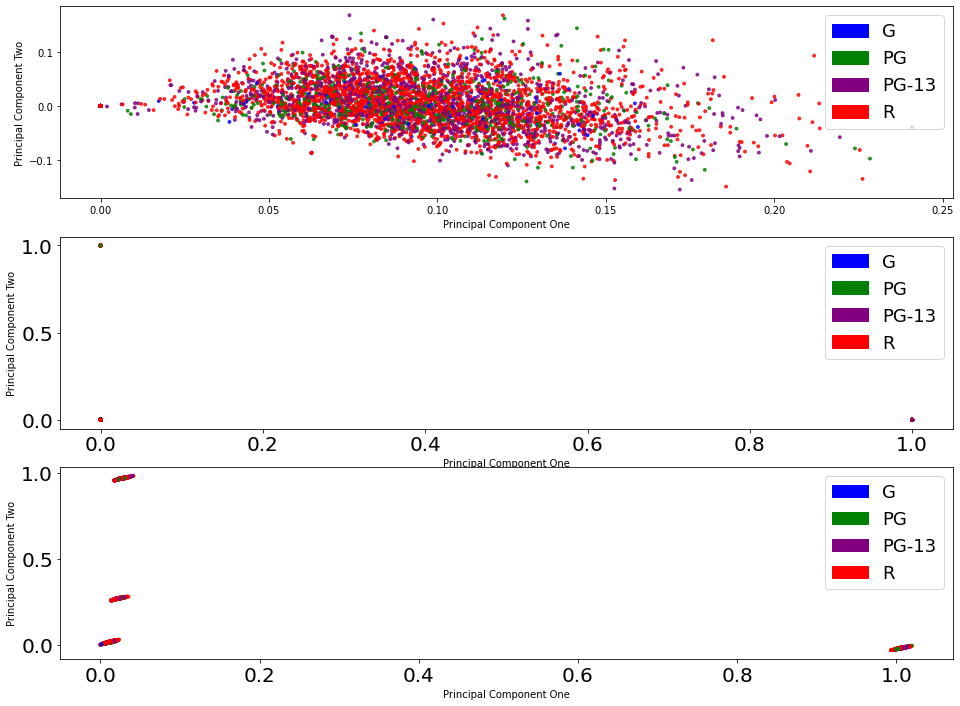

In [26]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.pyplot as plt

import matplotlib 
import matplotlib.patches as mpatches


# X_full = hstack([X_train_tfidf,genres_mat])
# X_tfidf = hstack([train_tfidf])
# y = ratings["encoded_rating"]
test_labels = ["G", "PG", "PG-13", "R"]

def plot_LSA(test_data, test_labels, plot=True):
    """
    This function first uses SK-Learn's truncated SVD (LSA) class to 
    transform the high dimensionality (number of columns) of the BoW 
    embedding down to 2 dimensions. Then the two dimensions are used
    to plot each song, colored by the song writer (class).
    
    Inputs:
        test_data (pd.DataFrame): BoW embeddings.
        test_labels (pd.Series): In this case the songwriter of each
        Beatles' song.
        plot (boolean): Whether or not to plot. Defaults to True.
    
    Outputs:
        None.
    """
    
    lsa = TruncatedSVD(n_components=2)
    lsa.fit(test_data)
    lsa_scores = lsa.transform(test_data)
    color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
    color_column = [color_mapper[label] for label in test_labels]
    colors = ['blue','green','purple', 'red']
    if plot:
        plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
        blue_patch = mpatches.Patch(color='blue', label='G')
        green_patch = mpatches.Patch(color='green', label='PG')
        purple_patch = mpatches.Patch(color='purple', label='PG-13')
        orange_patch = mpatches.Patch(color='red', label='R')
        plt.legend(handles=[blue_patch, green_patch, purple_patch, orange_patch], prop={'size': 18})
        plt.xlabel('Principal Component One')
        plt.ylabel('Principal Component Two')
        plt.rcParams["xtick.labelsize"] = 20
        plt.rcParams["ytick.labelsize"] = 20

plt.figure(1, figsize=(16, 12))
plt.subplot(3, 1, 1)
plot_LSA(X_train_tfidf, y_train)
plt.subplot(3, 1, 2)
plot_LSA(X_train_extra_features_mat, y_train)
plt.subplot(3, 1, 3)
plot_LSA(X_train_full, y_train)



## Export 

In [28]:
import joblib


best_model = SVC(kernel='linear',  class_weight='balanced')
best_model.fit(X_train_full, y_train)

filename = os.path.join(
    "..", "saved_models", "ratings_SVM_classifier.sav"
)
joblib.dump(best_model, filename)

['../saved_models/ratings_SVM_classifier.sav']